In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
#load dataset
data = pd.read_csv('/kaggle/input/food-delivery-time-prediction/Food_Delivery_Times.csv')

In [78]:
# top 5 rows
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [79]:
# dimesnion
data.shape

(1000, 9)

In [80]:
# basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [81]:
# Null check
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [82]:
data.shape

(1000, 9)

In [83]:
# Descriptive statistics
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### **6 Key Insights from the Descriptive Statistics**

1. **Delivery Distance Range:**  
   Deliveries typically cover an average distance of **10.05 km**, with a range of **0.59 km to 19.99 km**. This suggests that most orders are local, within a moderate radius.

2. **Delivery Time Distribution:**  
   The average delivery time is approximately **56.43 minutes**, with a standard deviation of **21.57 minutes**. While most deliveries are completed in under an hour, there are outliers extending delivery times beyond **2 hours**.

3. **Order Preparation Time:**  
   The preparation time averages **17 minutes**, with a range from **5 minutes to 29 minutes**. This indicates a manageable preparation process, with the majority of orders prepared in **10–20 minutes**.

4. **Courier Experience Variability:**  
   Couriers have an average experience of **4.6 years**, with significant variability (standard deviation: **2.92 years**) and a mix of new (0 years) and highly experienced (up to 9 years) personnel.

5. **Symmetry in Preparation and Delivery Times:**  
   The **mean and median values** for both preparation time (17 minutes) and delivery time (55 minutes) are closely aligned, indicating relatively symmetrical distributions for these key metrics.

6. **Dataset Completeness and Quality:**  
   The dataset contains **883 valid records**, with missing `Order_IDs` likely removed during preprocessing. Key variables like `Distance_km` and `Delivery_Time_min` are complete, but handling outliers or edge cases is critical for better model performance.

In [105]:
# Fill missing categorical columns with mode
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)
data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0], inplace=True)
data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)
# Fill missing numerical columns with mean
data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean(), inplace=True)


# Exploratoty Data Analysis

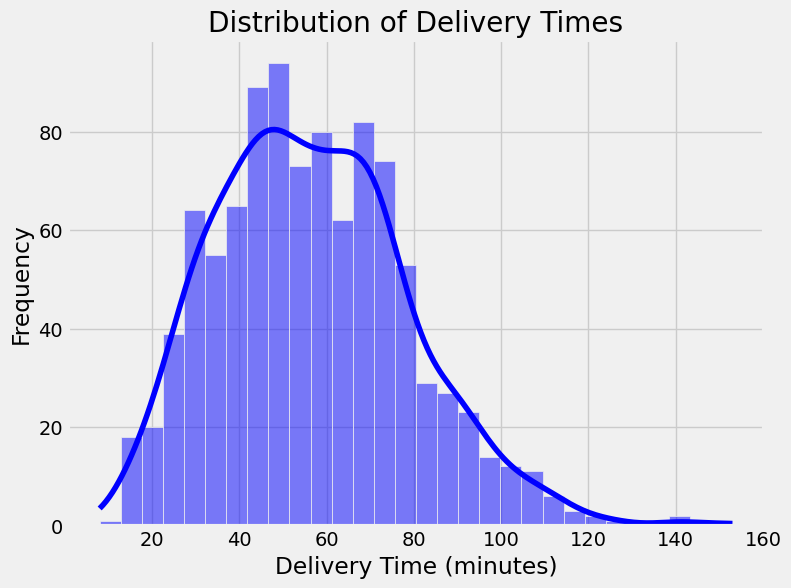

In [85]:
# Distribution of delivery times
plt.figure(figsize=(8, 6))
sns.histplot(data['Delivery_Time_min'], kde=True, bins=30, color='blue')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()


In [106]:
df = data

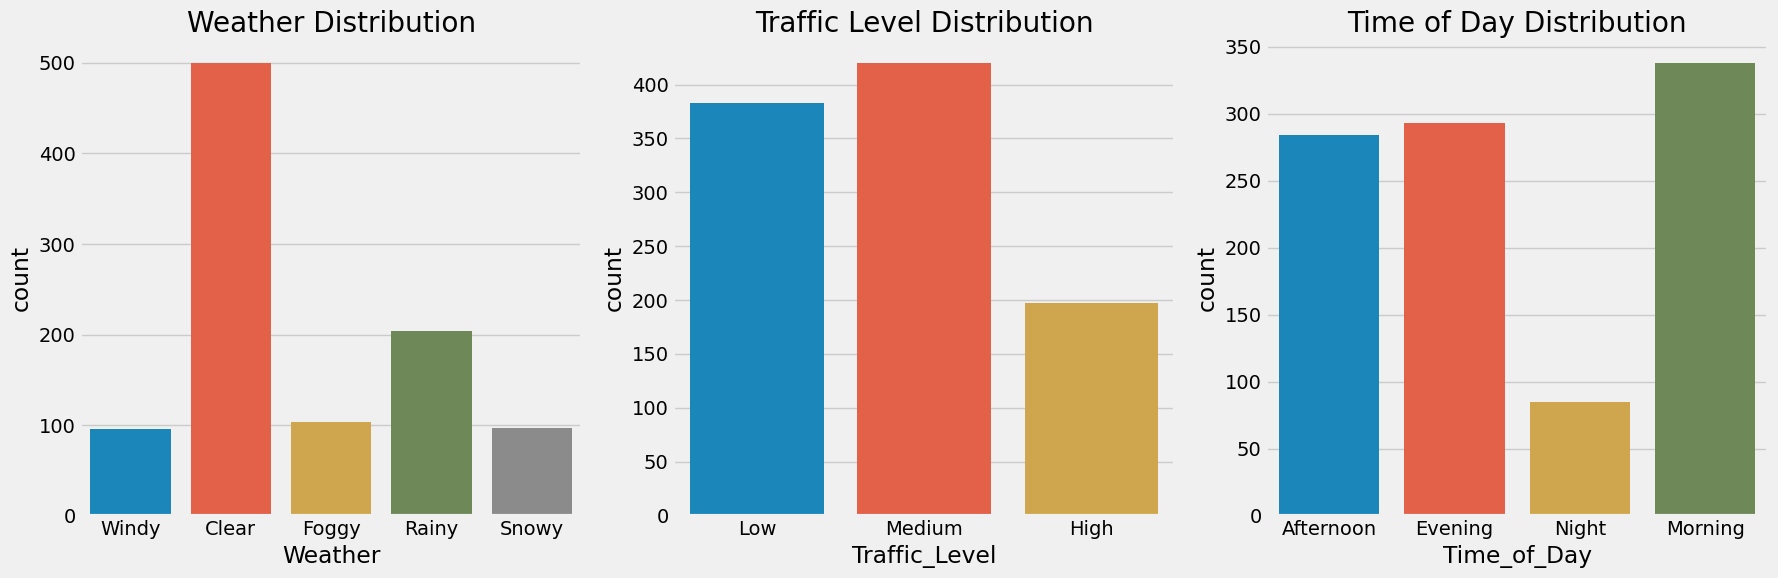

In [107]:
# Distribution of categorical features
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='Weather', data=df, ax=ax[0])
sns.countplot(x='Traffic_Level', data=df, ax=ax[1])
sns.countplot(x='Time_of_Day', data=df, ax=ax[2])

ax[0].set_title('Weather Distribution')
ax[1].set_title('Traffic Level Distribution')
ax[2].set_title('Time of Day Distribution')

plt.tight_layout()
plt.show()

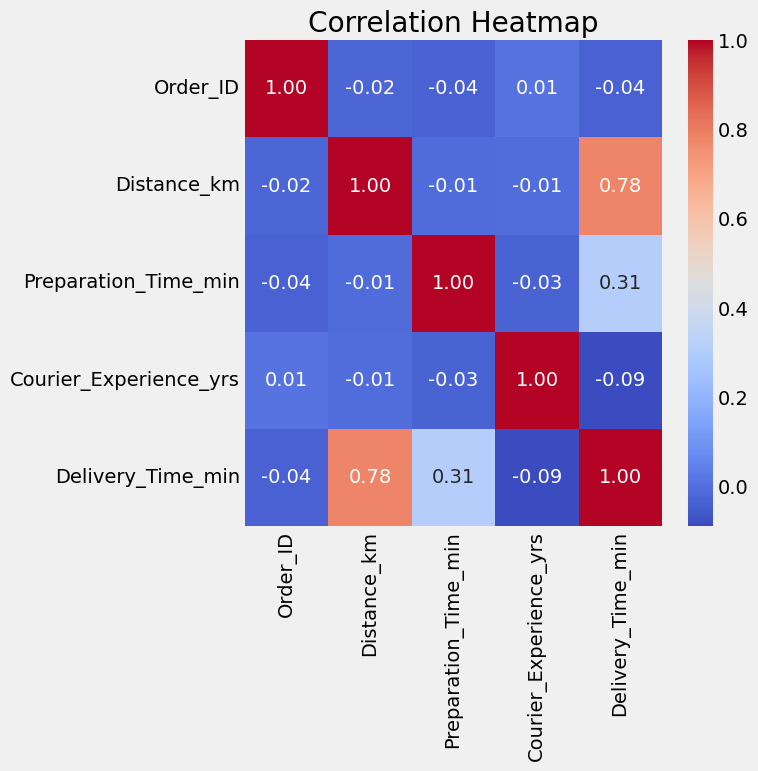

In [86]:
# Correlation heatmap
plt.figure(figsize=(6,6))
corr = data.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Distance and Delivery time Highly positively correlated

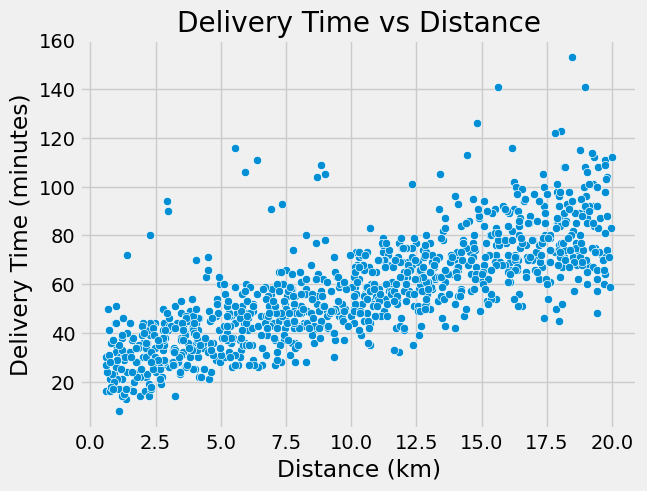

In [87]:
# Delivery time vs distance
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=data)
plt.title('Delivery Time vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

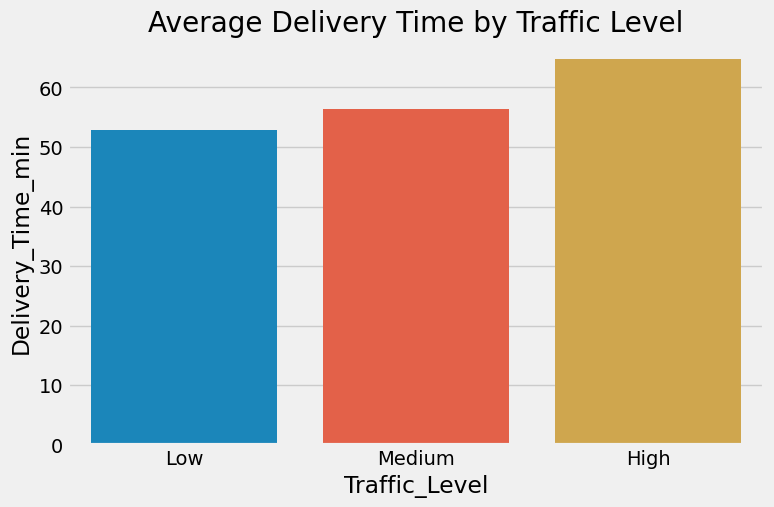

In [88]:
#Average Delivery Time by Traffic Level
plt.figure(figsize=(8, 5))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=data, ci = None)
plt.title('Average Delivery Time by Traffic Level')
plt.show()


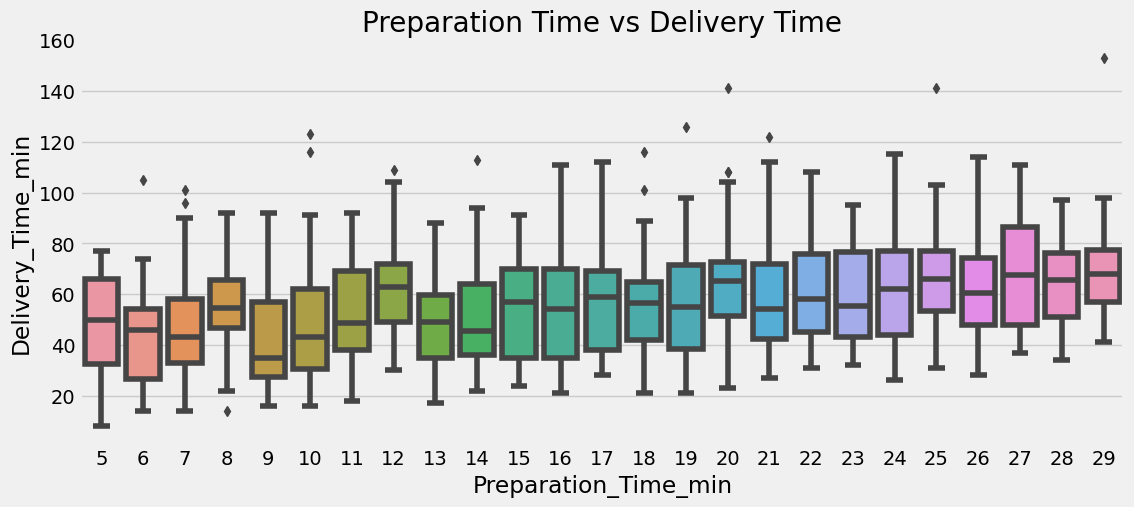

In [89]:
#Preparation Time vs Delivery Time
plt.figure(figsize=(12, 5))
sns.boxplot(x='Preparation_Time_min', y='Delivery_Time_min', data=data)
plt.title('Preparation Time vs Delivery Time')
plt.show()


No such pattern observed between Prep time and Delivery time

In [90]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)


In [91]:
data.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [92]:
# Preparing data for modeling
X = data.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y = data['Delivery_Time_min']

In [93]:
X.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,False,False,False,False,True,False,False,True,False,False,False


In [94]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [96]:
# Predictions
y_pred = model.predict(X_test_scaled)


In [97]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [98]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 7.098900000000001
MSE: 104.95552500000002
RMSE: 10.24478037831949
R2 Score: 0.7658429080489857


## Comparing Original and Prediction result 

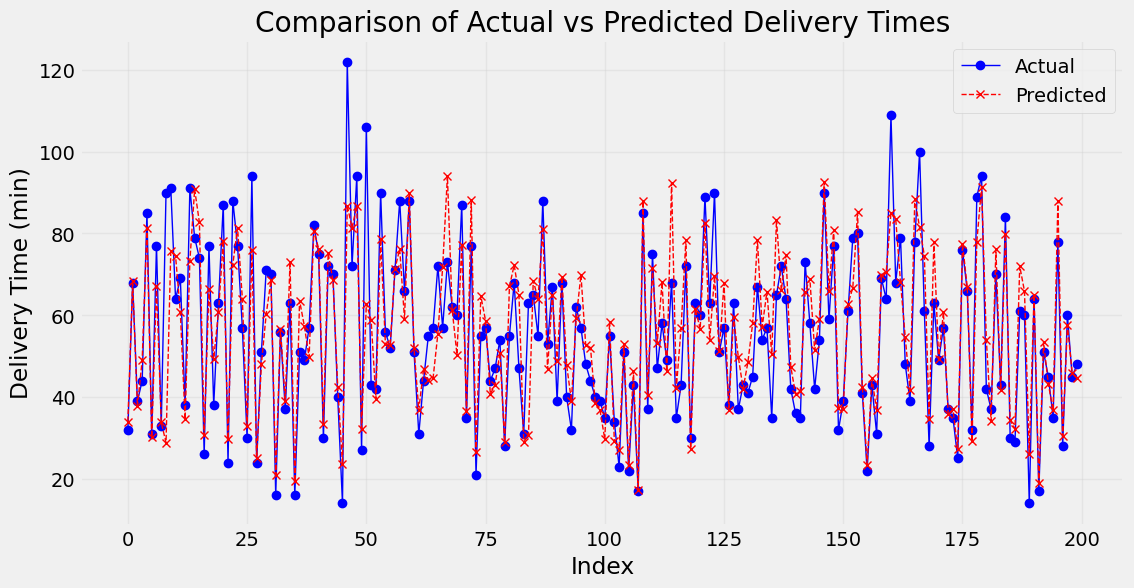

In [100]:
# Line chart comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicted', color='red', marker='x', linestyle='--', linewidth=1)
plt.title('Comparison of Actual vs Predicted Delivery Times')
plt.xlabel('Index')
plt.ylabel('Delivery Time (min)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Homoscedasticity Check: 
If the residuals are randomly scattered around the horizontal axis (zero line), it suggests homoscedasticity.

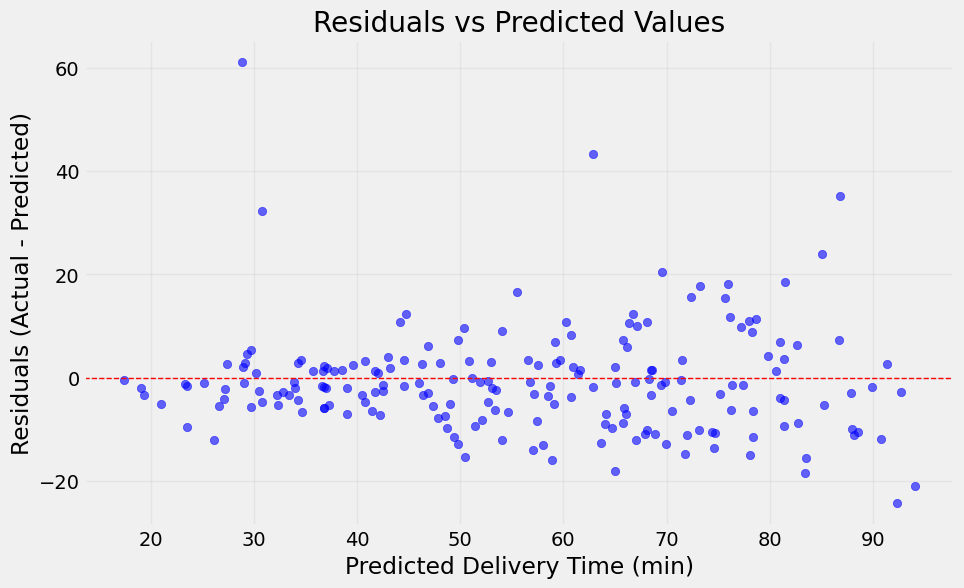

In [101]:
# Calculate residuals
residuals = y_test.values - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Time (min)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(alpha=0.3)
plt.show()


## Linear Regression

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
# Label encoding for categorical features
le = LabelEncoder()

df['Weather'] = le.fit_transform(df['Weather'])
df['Traffic_Level'] = le.fit_transform(df['Traffic_Level'])
df['Time_of_Day'] = le.fit_transform(df['Time_of_Day'])
df['Vehicle_Type'] = le.fit_transform(df['Vehicle_Type'])

# Display transformed dataset
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,4,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68


In [112]:
# Feature scaling (Standardization) for numerical features
scaler = StandardScaler()
df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']] = scaler.fit_transform(df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']])

# Verify scaling
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,-0.374085,4,1,0,2,-0.691853,-1.247665,43
1,738,1.117008,0,2,1,0,0.419111,-0.899095,84
2,741,-0.094835,1,1,3,2,1.530076,-1.247665,59
3,661,-0.460144,2,2,0,2,-1.663947,-1.247665,37
4,412,1.575401,0,1,2,0,-0.136371,0.146615,68


In [113]:
# Splitting dataset into train and test sets
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
# Training Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 109.20229935083353
R-squared: 0.7563683012365922


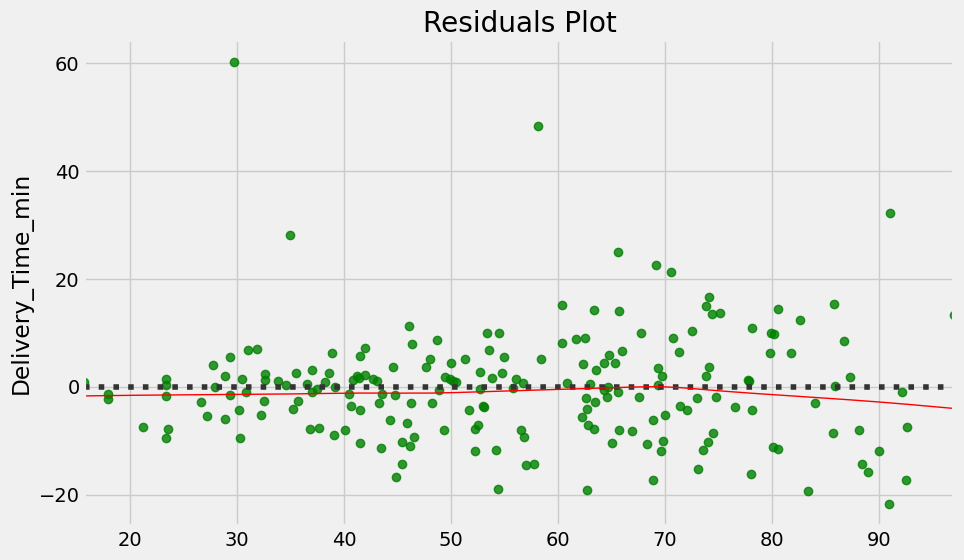

In [116]:
# Plotting residuals
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g", line_kws={"color": "r", "lw": 1})
plt.title('Residuals Plot')
plt.show()


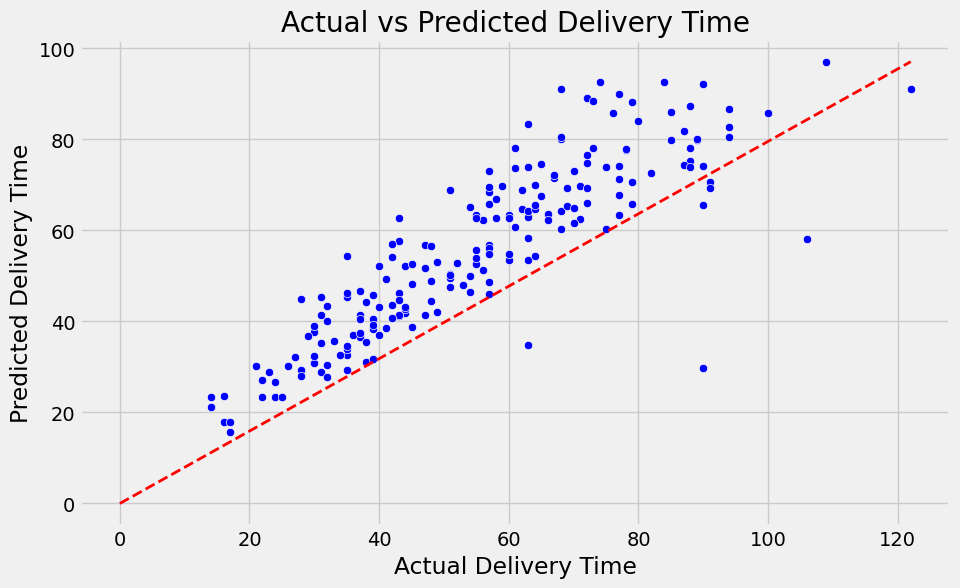

In [117]:
# Prediction vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Delivery Time')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.show()


In [118]:
# Summary of model performance
performance_summary = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})
performance_summary


,Metric,Value
0,Mean Squared Error,109.202299
1,R-squared,0.756368
